In [1]:
import numpy as np
import torch
import monai
import torchvision.models as models
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_current_lr(optimizer):
    """
    Gives the current learning rate of optimizer
    :param optimizer: Optimizer instance
    :return: Learning rate of specified optimizer
    """
    for param_group in optimizer.param_groups:
        return param_group['lr']

In [3]:
epochs = 100
model = models.resnet18()

### Constant

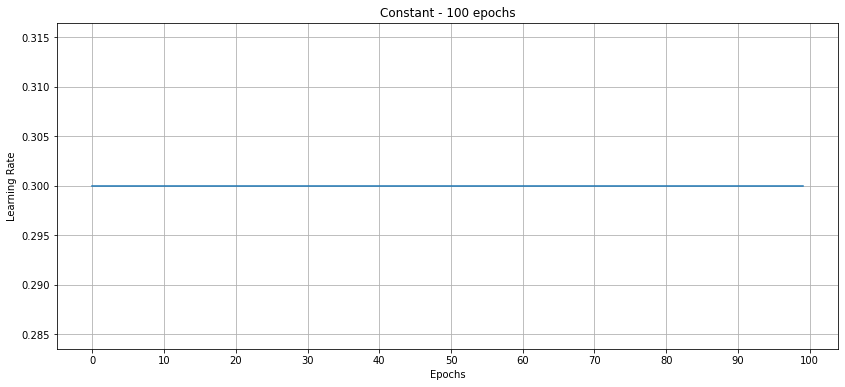

In [4]:
optim = torch.optim.SGD(model.parameters(), lr=0.3)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optim, milestones=[9999], gamma=1)

lr_advance = []
for e in range(100):
    scheduler.step()
    lr_advance.append(get_current_lr(optim))

plt.figure(figsize=(14,6))
sns.lineplot(data=lr_advance)
plt.ylabel("Learning Rate")
plt.xlabel("Epochs")
plt.title("Constant - 100 epochs")
plt.xticks(np.arange(0, epochs+1, 10))
plt.grid()
plt.savefig("constant.jpg")

### Steps

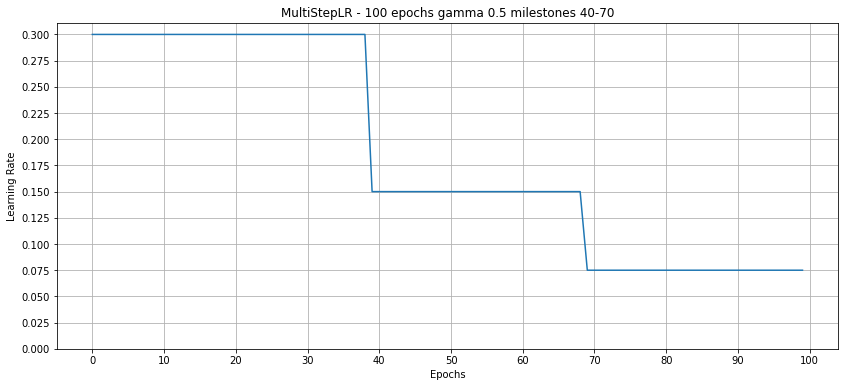

In [5]:
optim = torch.optim.SGD(model.parameters(), lr=0.3)
scheduler_steps = [40, 70]
scheduler = torch.optim.lr_scheduler.MultiStepLR(optim, milestones=scheduler_steps, gamma=0.5)

lr_advance = []
for e in range(100):
    scheduler.step()
    lr_advance.append(get_current_lr(optim))

plt.figure(figsize=(14,6))
sns.lineplot(data=lr_advance)
plt.ylabel("Learning Rate")
plt.xlabel("Epochs")
plt.title("MultiStepLR - 100 epochs gamma 0.5 milestones 40-70")
plt.xticks(np.arange(0, epochs+1, 10))
plt.yticks(np.arange(0, 0.31, 0.025))
plt.grid()
plt.savefig("multisteplr.jpg")

### One cycle LR

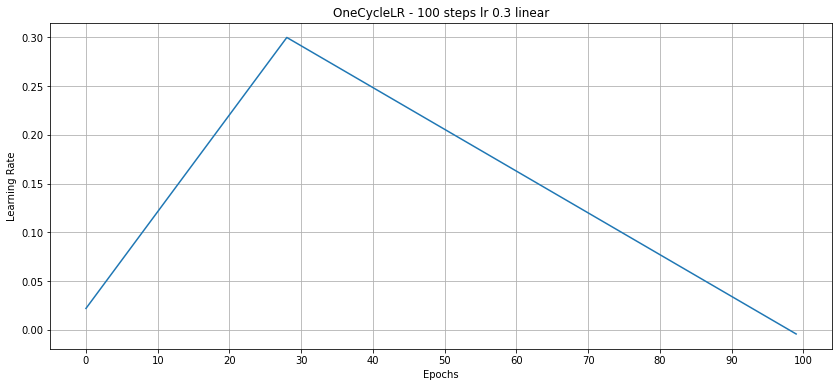

In [6]:
optim = torch.optim.SGD(model.parameters(), lr=0)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, total_steps=epochs, max_lr=0.3, anneal_strategy="linear")

lr_advance = []
for e in range(epochs):
    scheduler.step()
    lr_advance.append(get_current_lr(optim))

plt.figure(figsize=(14,6))
sns.lineplot(data=lr_advance)
plt.ylabel("Learning Rate")
plt.xlabel("Epochs")
plt.title("OneCycleLR - 100 steps lr 0.3 linear")
plt.xticks(np.arange(0, epochs+1, 10))
plt.grid()
plt.savefig("onecyclelr_linear.jpg")

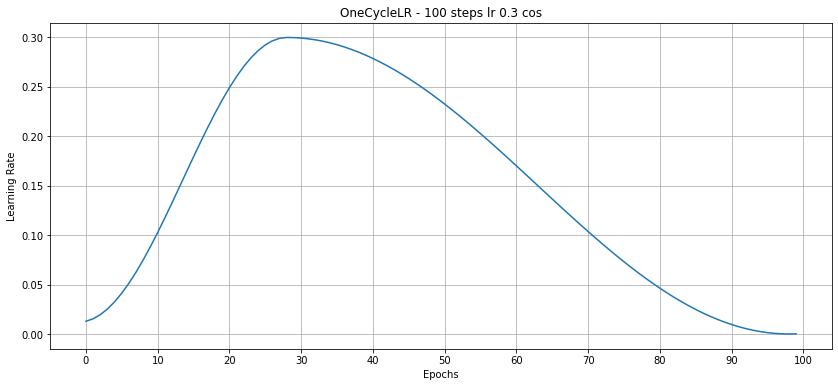

In [7]:
optim = torch.optim.SGD(model.parameters(), lr=0)
scheduler = torch.optim.lr_scheduler.OneCycleLR(optim, total_steps=epochs, max_lr=0.3, anneal_strategy="cos")

lr_advance = []
for e in range(epochs):
    scheduler.step()
    lr_advance.append(get_current_lr(optim))

plt.figure(figsize=(14,6))
sns.lineplot(data=lr_advance)
plt.ylabel("Learning Rate")
plt.xlabel("Epochs")
plt.title("OneCycleLR - 100 steps lr 0.3 cos")
plt.xticks(np.arange(0, epochs+1, 10))
plt.grid()
plt.savefig("onecyclelr_cos.jpg")

### Cyclic LR

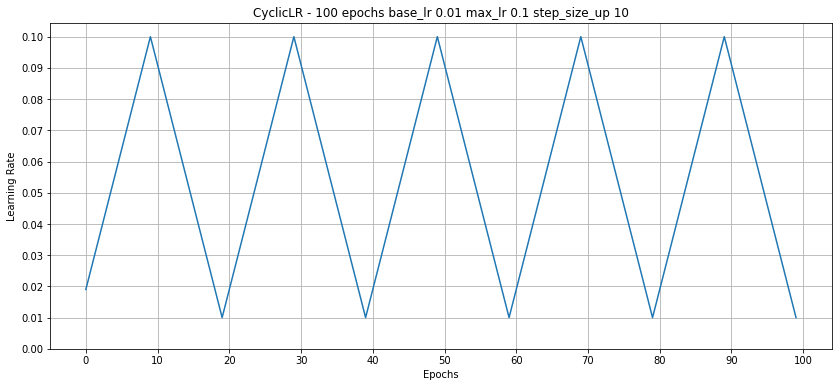

In [8]:
optim = torch.optim.SGD(model.parameters(), lr=0)
scheduler = torch.optim.lr_scheduler.CyclicLR(optim, base_lr=0.01, max_lr=0.1, step_size_up=10)

lr_advance = []
for e in range(epochs):
    scheduler.step()
    lr_advance.append(get_current_lr(optim))

plt.figure(figsize=(14,6))
sns.lineplot(data=lr_advance)
plt.ylabel("Learning Rate")
plt.xlabel("Epochs")
plt.title("CyclicLR - 100 epochs base_lr 0.01 max_lr 0.1 step_size_up 10")
plt.xticks(np.arange(0, epochs+1, 10))
plt.yticks(np.arange(0, 0.11, 0.01))
plt.grid()
plt.savefig("cyclic.jpg")

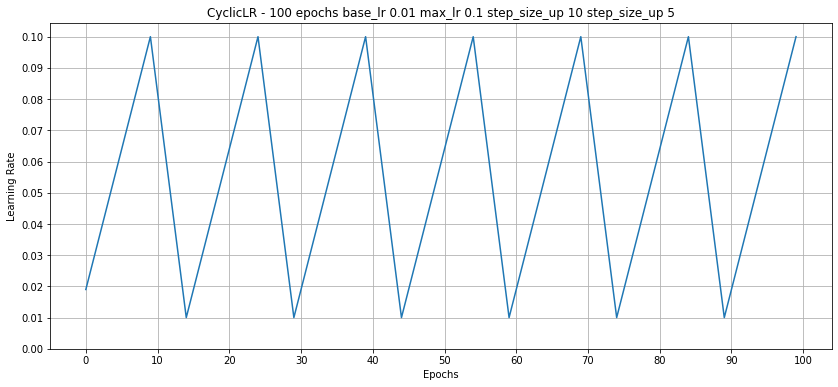

In [9]:
optim = torch.optim.SGD(model.parameters(), lr=0)
scheduler = torch.optim.lr_scheduler.CyclicLR(optim, base_lr=0.01, max_lr=0.1, step_size_up=10, step_size_down=5)

lr_advance = []
for e in range(epochs):
    scheduler.step()
    lr_advance.append(get_current_lr(optim))

plt.figure(figsize=(14,6))
sns.lineplot(data=lr_advance)
plt.ylabel("Learning Rate")
plt.xlabel("Epochs")
plt.title("CyclicLR - 100 epochs base_lr 0.01 max_lr 0.1 step_size_up 10 step_size_up 5")
plt.xticks(np.arange(0, epochs+1, 10))
plt.yticks(np.arange(0, 0.11, 0.01))
plt.grid()
plt.savefig("cyclic_stepsizes.jpg")

### SWALR

In [10]:
from torch.optim.swa_utils import SWALR

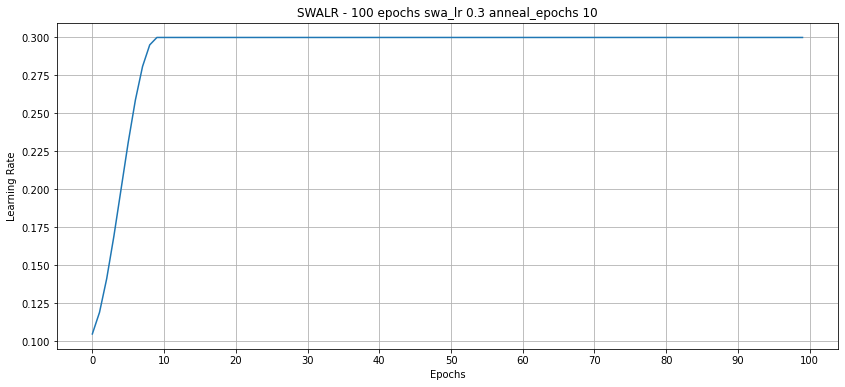

In [11]:
optim = torch.optim.SGD(model.parameters(), lr=0.1)
scheduler = SWALR(optim, swa_lr=0.3, anneal_epochs=10)

lr_advance = []
for e in range(100):
    scheduler.step()
    lr_advance.append(get_current_lr(optim))

plt.figure(figsize=(14,6))
sns.lineplot(data=lr_advance)
plt.ylabel("Learning Rate")
plt.xlabel("Epochs")
plt.title("SWALR - 100 epochs swa_lr 0.3 anneal_epochs 10")
plt.xticks(np.arange(0, epochs+1, 10))
plt.grid()
plt.savefig("swalr.jpg")